In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive/fer2013.csv"

'/content/drive/My Drive/fer2013.csv'


In [4]:
df = pd.read_csv('/content/drive/My Drive/fer2013.csv')
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [5]:
df = df.dropna()
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [6]:
train_samples = df[df['Usage']=="Training"]
validation_samples = df[df["Usage"]=="PublicTest"]
test_samples = df[df["Usage"]=="PrivateTest"]

In [7]:
train_samples

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
28704,2,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...,Training
28705,0,114 112 113 113 111 111 112 113 115 113 114 11...,Training
28706,4,74 81 87 89 95 100 98 93 105 120 127 133 146 1...,Training
28707,0,222 227 203 90 86 90 84 77 94 87 99 119 134 14...,Training


In [8]:
train_samples["emotion"]

0        0
1        0
2        2
3        4
4        6
        ..
28704    2
28705    0
28706    4
28707    0
28708    4
Name: emotion, Length: 28709, dtype: int64

In [9]:
y_train = train_samples["emotion"].astype(np.int32).values
y_valid = validation_samples["emotion"].astype(np.int32).values
y_test = test_samples["emotion"].astype(np.int32).values

In [10]:
print(y_train)

[0 0 2 ... 4 0 4]


In [11]:
X_train =np.array([ np.fromstring(image, np.uint8, sep=" ").reshape((48,48)) for image in train_samples["pixels"]])
X_valid =np.array([ np.fromstring(image, np.uint8, sep=" ").reshape((48,48)) for image in validation_samples["pixels"]])
X_test =np.array([ np.fromstring(image, np.uint8, sep=" ").reshape((48,48)) for image in test_samples["pixels"]])

In [12]:
print(X_train)

[[[ 70  80  82 ...  52  43  41]
  [ 65  61  58 ...  56  52  44]
  [ 50  43  54 ...  49  56  47]
  ...
  [ 91  65  42 ...  72  56  43]
  [ 77  82  79 ... 105  70  46]
  [ 77  72  84 ... 106 109  82]]

 [[151 150 147 ... 129 140 120]
  [151 149 149 ... 122 141 137]
  [151 151 156 ... 109 123 146]
  ...
  [188 188 121 ... 185 185 186]
  [188 187 196 ... 186 182 187]
  [186 184 185 ... 193 183 184]]

 [[231 212 156 ...  44  27  16]
  [229 175 148 ...  27  35  27]
  [214 156 157 ...  28  22  28]
  ...
  [241 245 250 ...  57 101 146]
  [246 250 252 ...  78 105 162]
  [250 251 250 ...  88 110 152]]

 ...

 [[ 74  81  87 ... 189 191 192]
  [ 78  82  89 ... 185 189 193]
  [ 81  86  94 ... 176 185 193]
  ...
  [ 90  99 113 ... 192 195 197]
  [ 88  96 114 ... 192 194 192]
  [ 88  97 110 ... 188 187 187]]

 [[222 227 203 ... 138 132 122]
  [222 226 203 ... 142 136 127]
  [222 225 206 ... 147 143 129]
  ...
  [179 180 177 ... 141 139 137]
  [188 182 176 ... 138 136 135]
  [181 168 155 ... 136 136 1

In [16]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(64,(3,3), input_shape=(48,48, 1), padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(128,(5,5), padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(512,(3,3), padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (1,1)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(512,(3,3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (1,1)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))


model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(7,activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(lr=0.001) , metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [17]:

X_train = X_train.reshape((-1,48,48,1)).astype(np.float32)
X_valid = X_valid.reshape((-1,48,48,1)).astype(np.float32)
X_test = X_test.reshape((-1,48,48,1)).astype(np.float32)

X_train_std = X_train/255.
X_valid_std = X_valid/255.
X_test_std = X_test/255.


history = model.fit(X_train_std, y_train,batch_size=128,epochs=35, validation_data=(X_valid_std, y_valid), shuffle=True)



Epoch 1/35
225/225 [==============================] - 16s 66ms/step - loss: 1.9488 - accuracy: 0.2977 - val_loss: 2.2432 - val_accuracy: 0.1819
Epoch 2/35
225/225 [==============================] - 15s 66ms/step - loss: 1.4245 - accuracy: 0.4514 - val_loss: 1.5055 - val_accuracy: 0.3957
Epoch 3/35
225/225 [==============================] - 15s 66ms/step - loss: 1.2183 - accuracy: 0.5384 - val_loss: 1.2375 - val_accuracy: 0.5294
Epoch 4/35
225/225 [==============================] - 15s 67ms/step - loss: 1.0985 - accuracy: 0.5830 - val_loss: 1.1839 - val_accuracy: 0.5536
Epoch 5/35
225/225 [==============================] - 15s 67ms/step - loss: 1.0192 - accuracy: 0.6152 - val_loss: 1.1531 - val_accuracy: 0.5687
Epoch 6/35
225/225 [==============================] - 15s 68ms/step - loss: 0.9249 - accuracy: 0.6515 - val_loss: 1.2176 - val_accuracy: 0.5433
Epoch 7/35
225/225 [==============================] - 15s 69ms/step - loss: 0.8411 - accuracy: 0.6819 - val_loss: 1.2352 - val_accuracy:

In [69]:
print("Evaluate on test data")
results = model.evaluate(X_test_std, y_test)
print("test loss, test accuracy:", results)

Evaluate on test data
113/113 [==============================] - 1s 7ms/step - loss: 2.2752 - accuracy: 0.6130
test loss, test accuracy: [2.275212049484253, 0.6129841208457947]


In [64]:
predictions = model.predict(X_test_std)
predictions_new = np.argmax(predictions, axis=1)

Text(33.0, 0.5, 'True Labels')

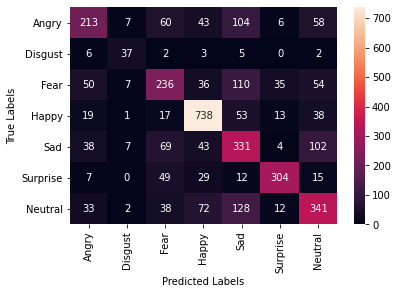

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, predictions_new)
data_frame = pd.DataFrame(cm)
data_frame.rename(columns = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Sad',5:'Surprise',6:'Neutral'},inplace = True)
data_frame.rename(index = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Sad',5:'Surprise',6:'Neutral'},inplace = True)
sns.heatmap(data_frame, annot=True, fmt='g')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

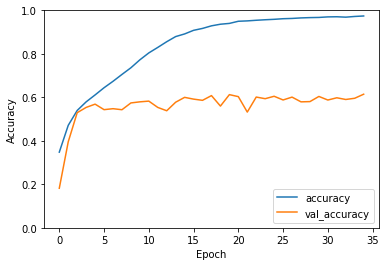

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

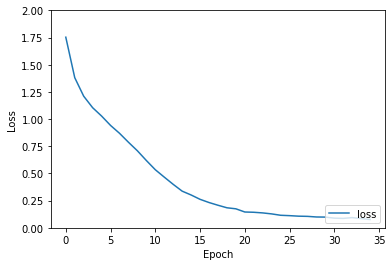

In [59]:
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='lower right')